In [428]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.compose import ColumnTransformer
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
import pickle

In [430]:
# This is used to avoid column truncation when displaying Telecom_churn
pd.set_option("display.max_columns", None) 

In [432]:
Telecom_churn = pd.read_csv ("WA_Fn-UseC_-Telco-Customer-Churn.csv")

In [433]:
Telecom_churn.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [434]:
Telecom_churn.tail()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes
7042,3186-AJIEK,Male,0,No,No,66,Yes,No,Fiber optic,Yes,No,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.5,No


In [435]:
Telecom_churn.shape

(7043, 21)

In [436]:
Telecom_churn.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [442]:
Telecom_churn.dtypes


customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [443]:
Telecom_churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [444]:
# droping customerID column, not needed for our prediction
Telecom_churn= Telecom_churn.drop(columns= ["customerID"])

In [445]:
Telecom_churn.head(2)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No


In [446]:
Telecom_churn.info() # Now the customerID column,has been droped 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [447]:
# print the unique values 
numerical_feature_lisy = ["SeniorCitizen", "tenure", "MonthlyCharges", "TotalCharges"]

for col in Telecom_churn.columns:
    if col not in numerical_feature_lisy:
        print(col, Telecom_churn[col].unique())
        print("-"*50)

gender ['Female' 'Male']
--------------------------------------------------
Partner ['Yes' 'No']
--------------------------------------------------
Dependents ['No' 'Yes']
--------------------------------------------------
PhoneService ['No' 'Yes']
--------------------------------------------------
MultipleLines ['No phone service' 'No' 'Yes']
--------------------------------------------------
InternetService ['DSL' 'Fiber optic' 'No']
--------------------------------------------------
OnlineSecurity ['No' 'Yes' 'No internet service']
--------------------------------------------------
OnlineBackup ['Yes' 'No' 'No internet service']
--------------------------------------------------
DeviceProtection ['No' 'Yes' 'No internet service']
--------------------------------------------------
TechSupport ['No' 'Yes' 'No internet service']
--------------------------------------------------
StreamingTV ['No' 'Yes' 'No internet service']
--------------------------------------------------
StreamingM

In [448]:
# Check for missing data from each column 

missing_or_blank = pd.DataFrame()

for col in Telecom_churn.columns:
    if Telecom_churn[col].dtype == 'object':
        # Check for NaN or blank strings
        missing_or_blank[col] = Telecom_churn[col].isnull() | Telecom_churn[col].str.strip().eq("")
    else:
        # Only check for NaN in numeric columns
        missing_or_blank[col] = Telecom_churn[col].isnull()

# Count missing or blank per column
missing_or_blank.sum()


gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [449]:
# replace all the missing value with " ", then replace the " " with 0.0

In [450]:
Telecom_churn[Telecom_churn["TotalCharges"]==" "]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [451]:
Telecom_churn["TotalCharges"] = Telecom_churn["TotalCharges"].replace({" ": "0.0"})

In [455]:
Telecom_churn["TotalCharges"] = Telecom_churn["TotalCharges"].astype(float)

In [459]:
Telecom_churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [462]:
# Now let check for the missing data again 
missing_or_blank = pd.DataFrame()

for col in Telecom_churn.columns:
    if Telecom_churn[col].dtype == 'object':
        # Check for NaN or blank strings
        missing_or_blank[col] = Telecom_churn[col].isnull() | Telecom_churn[col].str.strip().eq("")
    else:
        # Only check for NaN in numeric columns
        missing_or_blank[col] = Telecom_churn[col].isnull()

# Count missing or blank per column
missing_or_blank.sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [463]:
Telecom_churn.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [464]:
# Since there is no missing data again, let check for the imbalance 

print(Telecom_churn["Churn"].value_counts())

Churn
No     5174
Yes    1869
Name: count, dtype: int64


Churn
No     5174
Yes    1869
Name: count, dtype: int64
This is a sign of imbalance

why?

Imbalance in a classification dataset refers to a situation where the number of instances in one class significantly exceeds the number in the other(s). This can mislead the model during training and lead to poor generalization for the minority class.

EDA - Exploratory Data Anaysis

In [466]:
Telecom_churn.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [467]:
Telecom_churn.shape

(7043, 20)

In [468]:
Telecom_churn.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


In [471]:
# Numerical Feature Analysis

# let create a function to plot the graph for all the 4 numerical column we have 

def plot_histogram(Telecom_churn, column_name):

    plt.figure(figsize = (5, 3))
    sns.histplot(Telecom_churn[column_name], kde = True)
    plt.title(f"Distribution of {column_name}")
    
    col_mean = Telecom_churn[column_name].mean() # to calculate the mean and median 
    col_median = Telecom_churn[column_name].median()
    
    plt.axvline(col_mean, color = "green", linestyle = "--", label = "Mean") # to get the vertical line 
    plt.axvline(col_median, color = "brown", linestyle = "--", label = "Median")

    plt.legend()

    plt.show()

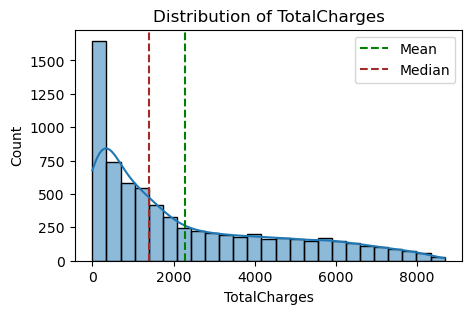

In [472]:
plot_histogram(Telecom_churn, "TotalCharges")

The graph explain the following: 

A right-skewed distribution (long tail to the right).

The mean is higher than the median, which confirms the skew.

This tells you that most customers have lower TotalCharges, and only a few have very high charges.

In [475]:
# Now, let use subplot to have the graph on 2 by 2 ( 2 row and 2 column)

def plot_histogram(data, column_name, ax):  
    sns.histplot(data[column_name], kde=True, ax=ax)
    ax.set_title(f"Distribution of {column_name}")
    
    col_mean = data[column_name].mean()
    col_median = data[column_name].median()
    
    ax.axvline(col_mean, color="green", linestyle="--", label="Mean")
    ax.axvline(col_median, color="brown", linestyle="--", label="Median")
    
    ax.legend()


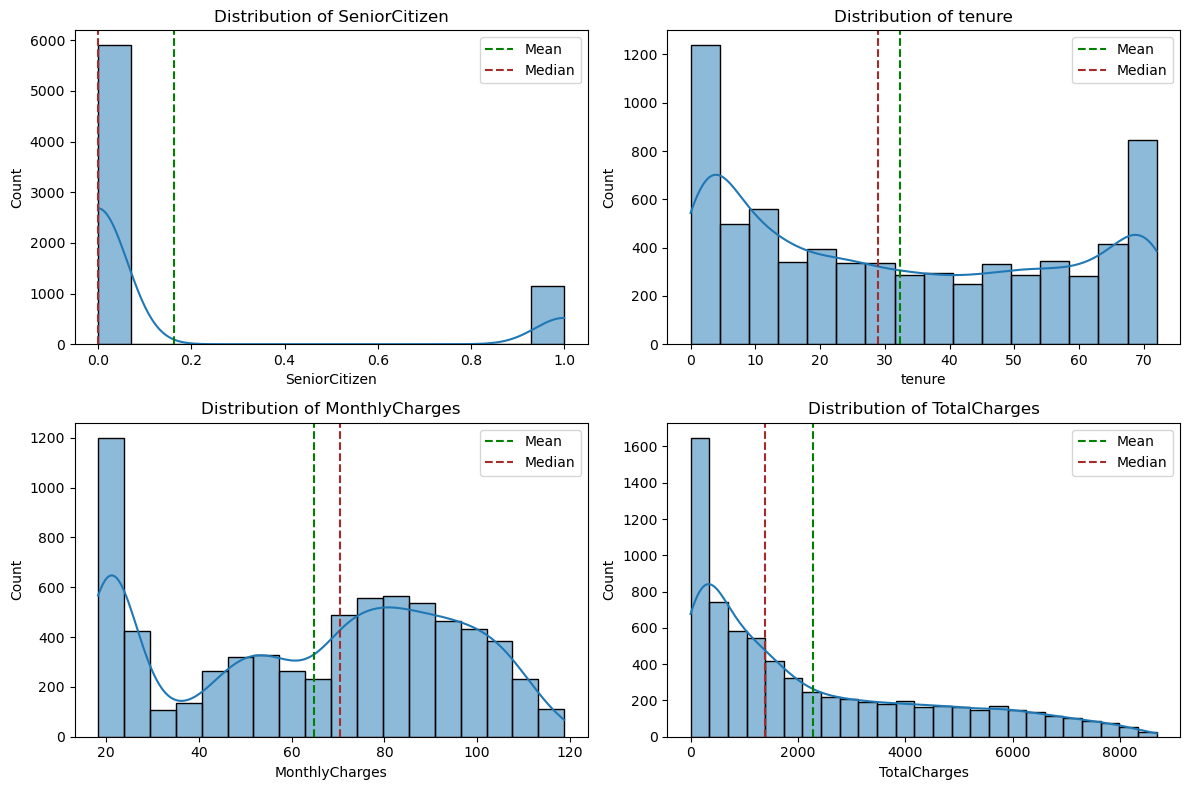

In [476]:
columns = ["SeniorCitizen", "tenure", "MonthlyCharges", "TotalCharges"]

fig, axes = plt.subplots(2, 2, figsize=(12, 8)) 

for i, column in enumerate(columns):
    row = i // 2
    col = i % 2
    plot_histogram(Telecom_churn, column, axes[row, col]) 

plt.tight_layout()
plt.show()


 1. Distribution of SeniorCitizen
Description: Binary column (0 or 1).

Observation:

A large spike at 0 indicates most customers are not senior citizens.

A smaller bar at 1 shows some are.

Mean and median are both very low, confirming the data is highly imbalanced.

Implication: Most customers are younger; senior citizens are a minority.

2. Distribution of Tenure
Description: Number of months a customer has stayed with the service.

Observation:

Distribution is bimodal (two peaks): many customers with low tenure and another peak at maximum tenure (~70 months).

The mean is slightly higher than the median → right-skewed distribution.

Implication: The company may have many new and very long-term users but fewer mid-term ones.

3. Distribution of MonthlyCharges
Description: Monthly bill amount.

Observation:

Distribution is somewhat uniform, with a slight concentration around $70–$80.

Mean and median are close, suggesting symmetric distribution.

Implication: Monthly charges are fairly evenly distributed, though certain price points are more common.

4. Distribution of TotalCharges
Description: Total amount paid by the customer over their time with the company.

Observation:

Highly right-skewed: many customers have low total charges, and fewer have high charges.

Mean is much higher than the median → strong skew.

Implication: Most customers have not been with the company long (low tenure), or have had low charges.



In [481]:
# Box plot for numerical features

def plot_boxplot(Telecom_churn, columns_name):
    plt.figure(figure = (3, 3))
    sns.boxplot(y = Telecom_churn[columns_name])
    plt.title(f"Distribution of [column_name)")
    plt.ylabel(columns_name)
    plt.show

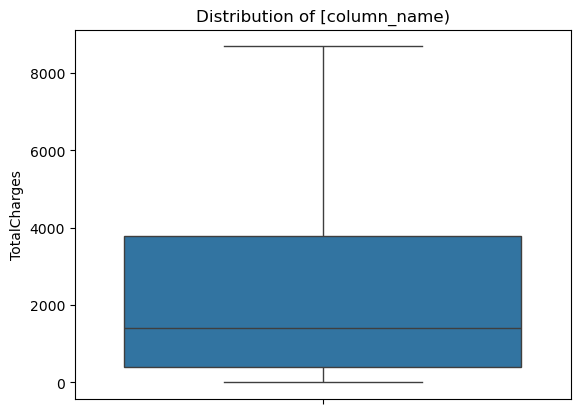

In [486]:
plot_boxplot(Telecom_churn, "TotalCharges")

In [488]:
def plot_boxplot(data, column_name, ax):
    sns.boxplot(y=data[column_name], ax=ax)
    ax.set_title(f"Distribution of {column_name}")
    ax.set_ylabel(column_name)

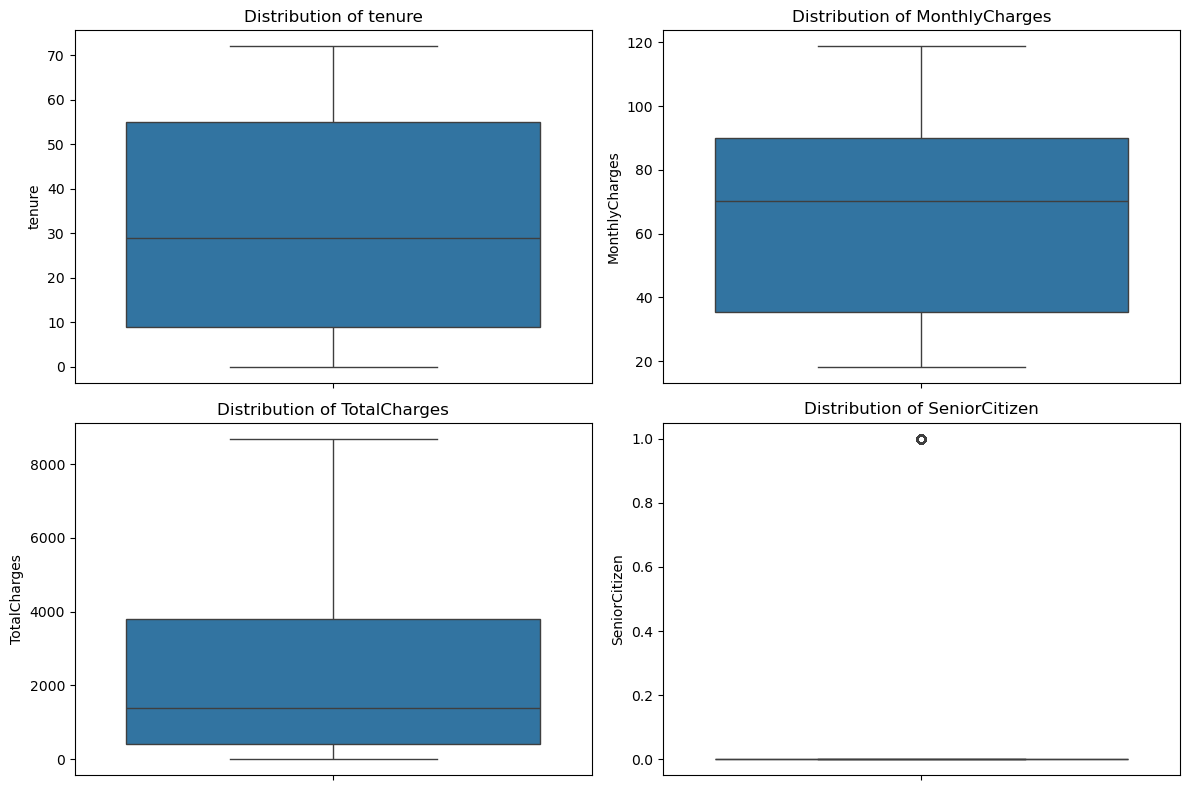

In [489]:
# List of numerical columns to plot
numerical_columns = ["tenure", "MonthlyCharges", "TotalCharges", "SeniorCitizen"]

# Create subplots: 2 rows, 2 columns
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

# Flatten axes for easy indexing
axes = axes.flatten()

# Loop through each column and plot
for i, column in enumerate(numerical_columns):
    plot_boxplot(Telecom_churn, column, axes[i])

plt.tight_layout()
plt.show()


1. Distribution of tenure
Range: 0 to ~72 months.

Median: Around 30.

Skewness: Slightly right-skewed – many users have lower tenure.

Insight: A significant number of customers are newer or short-term.

2. Distribution of MonthlyCharges
Range: ~20 to ~120.

Median: Around 70.

Skewness: Fairly symmetrical, no extreme outliers.

Insight: Monthly charges are evenly distributed, with most customers paying between 40–100.

3. Distribution of TotalCharges
Range: 0 to over 8000.

Median: Around 2000.

Skewness: Right-skewed (longer whisker on the right).

Insight: Most customers have lower total charges (likely due to short tenure), and some customers are long-time, high-spending users.

4. Distribution of SeniorCitizen
Binary Variable: 0 = Not a senior, 1 = Senior.

Observation:

Most values are at 0 (non-seniors).

A dot at 1 represents the minority of senior citizens.

Insight: This variable is heavily imbalanced, and you'll want to consider that if using it in machine learning models.


# Based on the boxplot visualizations, there are no significant outliers in the numerical features. The distribution of SeniorCitizen appears imbalanced, but as a binary variable, it does not indicate true outliers.


In [498]:
print("SeniorCitizen:", Telecom_churn["SeniorCitizen"].unique())
print("-" * 50)

SeniorCitizen: [0 1]
--------------------------------------------------


In [500]:
Telecom_churn.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


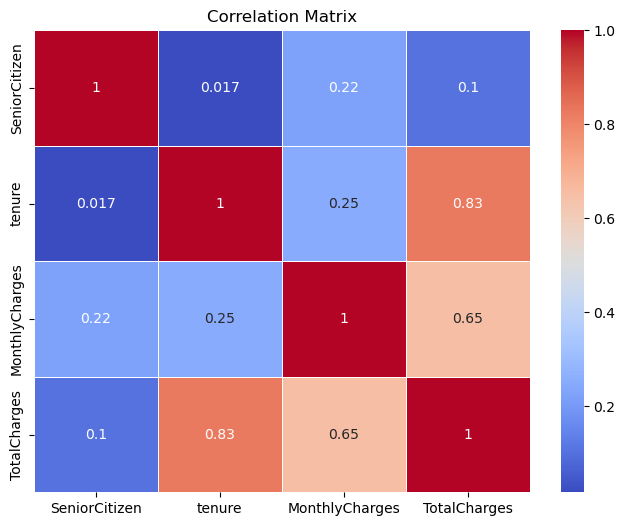

In [502]:
# Let find the correlation between numerical data to see how the corrolate with each other 

numerical_features = ["SeniorCitizen", "tenure", "MonthlyCharges", "TotalCharges"]

correlation_matrix = Telecom_churn[numerical_features].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()

The correlation matrix shows that TotalCharges is strongly correlated with both tenure (0.83) and MonthlyCharges (0.65), while SeniorCitizen has very weak correlations with all other variables. This indicates that tenure and billing features are closely related, while age group (senior status) has little influence on numerical billing patterns.

In [504]:
# print the unique values 
numerical_feature_lisy = ["SeniorCitizen", "tenure", "MonthlyCharges", "TotalCharges"]

for col in Telecom_churn.columns:
    if col not in numerical_feature_lisy:
        print(col, Telecom_churn[col].unique())
        print("-"*50)

gender ['Female' 'Male']
--------------------------------------------------
Partner ['Yes' 'No']
--------------------------------------------------
Dependents ['No' 'Yes']
--------------------------------------------------
PhoneService ['No' 'Yes']
--------------------------------------------------
MultipleLines ['No phone service' 'No' 'Yes']
--------------------------------------------------
InternetService ['DSL' 'Fiber optic' 'No']
--------------------------------------------------
OnlineSecurity ['No' 'Yes' 'No internet service']
--------------------------------------------------
OnlineBackup ['Yes' 'No' 'No internet service']
--------------------------------------------------
DeviceProtection ['No' 'Yes' 'No internet service']
--------------------------------------------------
TechSupport ['No' 'Yes' 'No internet service']
--------------------------------------------------
StreamingTV ['No' 'Yes' 'No internet service']
--------------------------------------------------
StreamingM

In [505]:
Categorical_data_1 = Telecom_churn.select_dtypes(include ="object").columns.to_list()

In [507]:
Categorical_data_1

['gender',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'Churn']

In [508]:
Categorical_data = Telecom_churn.select_dtypes(include ="object").columns.to_list()

Categorical_data = ["SeniorCitizen"] + Categorical_data_1

In [510]:
Categorical_data

['SeniorCitizen',
 'gender',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'Churn']

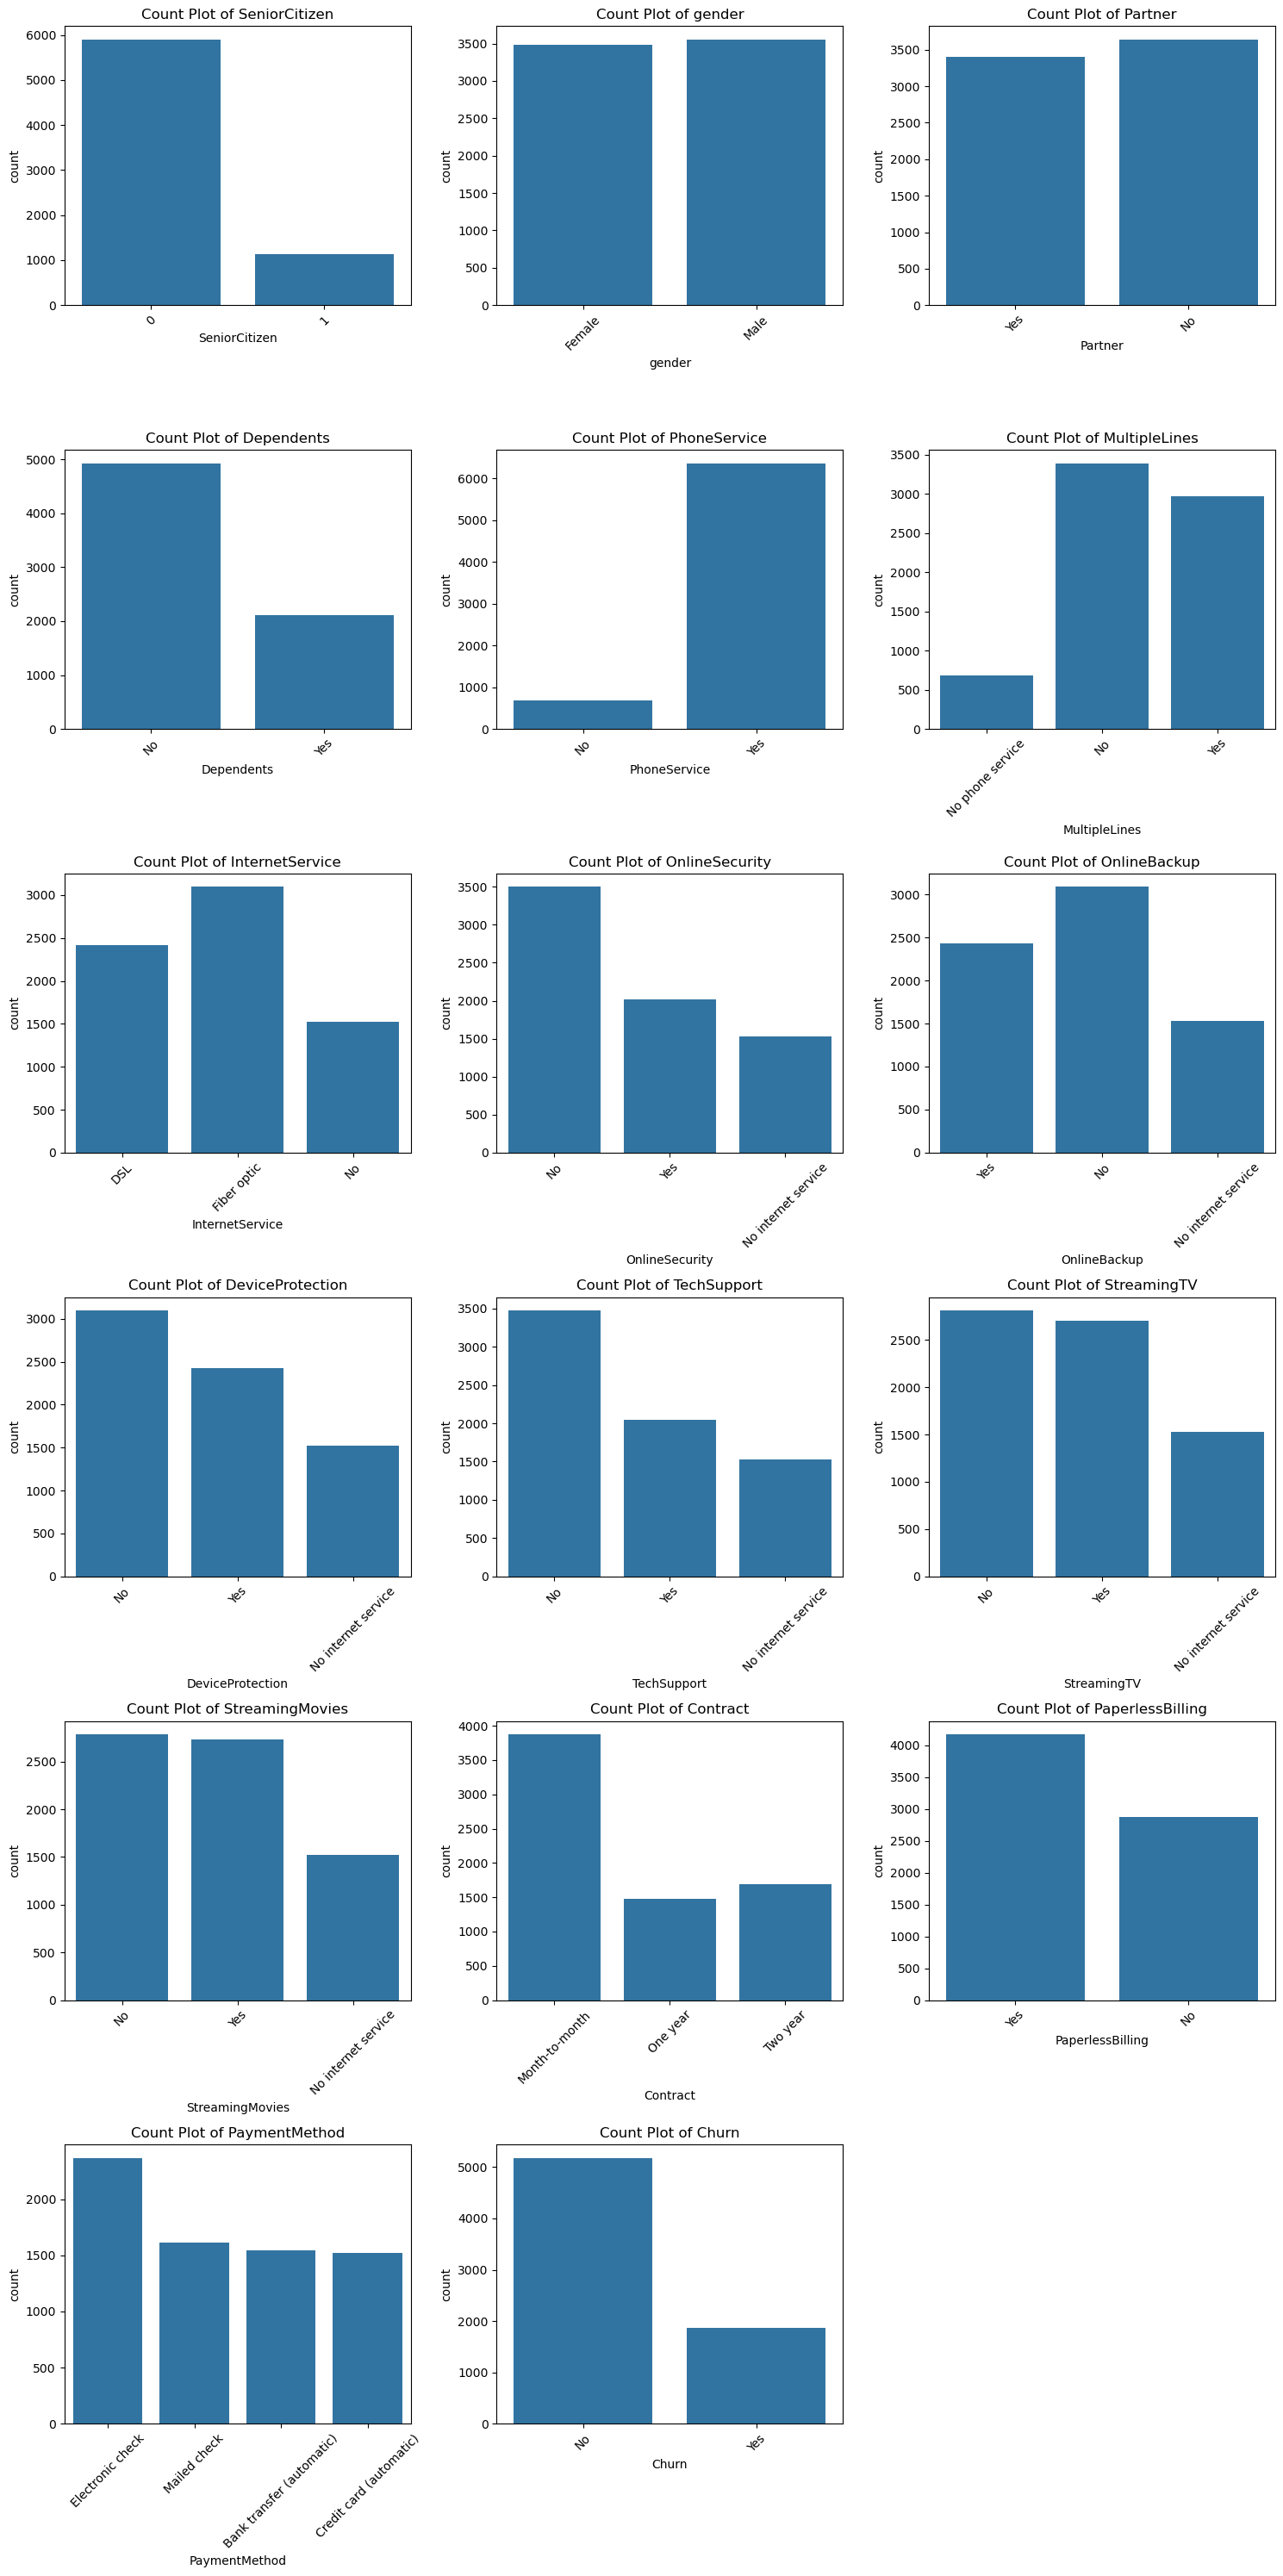

In [515]:
# Calculate the number of rows and columns for subplots
n = len(Categorical_data)
n_cols = 3
n_rows = -(-n // n_cols)  # Ceiling division

# Create subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5 * n_rows))
axes = axes.flatten()

# Loop and plot
for i, col in enumerate(Categorical_data):
    sns.countplot(x=Telecom_churn[col], ax=axes[i])
    axes[i].set_title(f"Count Plot of {col}")
    axes[i].tick_params(axis='x', rotation=45)

# Hide any unused axes
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

In [516]:
Telecom_churn.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


Why Target Imbalance Matters More Than Feature Imbalance

In classification problems—such as churn prediction—the balance of the target variable is more critical than that of the features. This is because an imbalanced target can bias the model toward the majority class. For example, in our churn dataset:

Churn = No: 5174 customers

Churn = Yes: 1869 customers

This imbalance means that if a model simply predicts "No" for every instance, it would still appear to be highly accurate (~73%), even though it's not actually learning to identify churned customers. This can lead to overfitting on the majority class and poor generalization to real-world churn cases.

Therefore, it is important to detect and address target imbalance using techniques such as:

Resampling (e.g., oversampling the minority class or undersampling the majority)

Using appropriate evaluation metrics like F1-score, precision, recall, or AUC instead of accuracy

Algorithmic adjustments, like applying class weights

Target imbalance must be carefully handled to ensure that the model truly learns to detect both classes effectively, especially the minority class, which is often the more important one in real-world scenarios.

In [518]:
print(Telecom_churn["Churn"].value_counts())

Churn
No     5174
Yes    1869
Name: count, dtype: int64


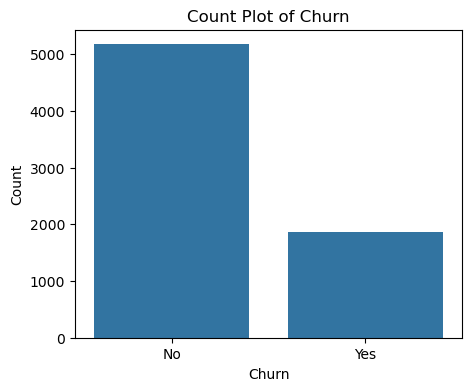

In [519]:
plt.figure(figsize=(5, 4))
sns.countplot(x=Telecom_churn["Churn"])
plt.title("Count Plot of Churn")
plt.xlabel("Churn")
plt.ylabel("Count")
plt.show()

In [520]:
# let me first replace my target with 1 for yes and 0 for No

Telecom_churn["Churn"] = Telecom_churn["Churn"].replace({"Yes": 1, "No": 0}).infer_objects(copy=False)

C:\Users\Job\AppData\Local\Temp\ipykernel_10128\3983535777.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  Telecom_churn["Churn"] = Telecom_churn["Churn"].replace({"Yes": 1, "No": 0}).infer_objects(copy=False)


In [521]:
Telecom_churn.head(3)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1


In [522]:
# Lebel encoding on categorical feature 

Telecom_churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [523]:
Telecom_churn_2 = Telecom_churn

In [524]:
Categorical_data 

['SeniorCitizen',
 'gender',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'Churn']

In [525]:
Categorical_data_2 = Categorical_data 

In [526]:
Categorical_data_2

['SeniorCitizen',
 'gender',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'Churn']

In [527]:
# Dictionary to store each column's encoder
encoders = {}

print("🔄 Starting label encoding for categorical columns...\n")

# Loop through each categorical column and apply label encoding
for column in Categorical_data_1:
    print(f"Encoding '{column}'...")

    label_encoder = LabelEncoder()

    # Fit and transform the column
    Telecom_churn[column] = label_encoder.fit_transform(Telecom_churn[column])

    # Store the encoder for possible inverse_transform or deployment use
    encoders[column] = label_encoder

    # Print unique class mapping
    print(f"  ➤ Classes: {label_encoder.classes_.tolist()}")
    print(f"  ➤ Sample Mapping: {dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))}\n")

print("✅ Encoding complete.\n")

# Save the encoders to a pickle file for future use
with open("encoders.pkl", "wb") as f:
    pickle.dump(encoders, f)

print("💾 Encoders saved to 'encoders.pkl'")

🔄 Starting label encoding for categorical columns...

Encoding 'gender'...
  ➤ Classes: ['Female', 'Male']
  ➤ Sample Mapping: {'Female': 0, 'Male': 1}

Encoding 'Partner'...
  ➤ Classes: ['No', 'Yes']
  ➤ Sample Mapping: {'No': 0, 'Yes': 1}

Encoding 'Dependents'...
  ➤ Classes: ['No', 'Yes']
  ➤ Sample Mapping: {'No': 0, 'Yes': 1}

Encoding 'PhoneService'...
  ➤ Classes: ['No', 'Yes']
  ➤ Sample Mapping: {'No': 0, 'Yes': 1}

Encoding 'MultipleLines'...
  ➤ Classes: ['No', 'No phone service', 'Yes']
  ➤ Sample Mapping: {'No': 0, 'No phone service': 1, 'Yes': 2}

Encoding 'InternetService'...
  ➤ Classes: ['DSL', 'Fiber optic', 'No']
  ➤ Sample Mapping: {'DSL': 0, 'Fiber optic': 1, 'No': 2}

Encoding 'OnlineSecurity'...
  ➤ Classes: ['No', 'No internet service', 'Yes']
  ➤ Sample Mapping: {'No': 0, 'No internet service': 1, 'Yes': 2}

Encoding 'OnlineBackup'...
  ➤ Classes: ['No', 'No internet service', 'Yes']
  ➤ Sample Mapping: {'No': 0, 'No internet service': 1, 'Yes': 2}

Encoding 

In [528]:
encoders

{'gender': LabelEncoder(),
 'Partner': LabelEncoder(),
 'Dependents': LabelEncoder(),
 'PhoneService': LabelEncoder(),
 'MultipleLines': LabelEncoder(),
 'InternetService': LabelEncoder(),
 'OnlineSecurity': LabelEncoder(),
 'OnlineBackup': LabelEncoder(),
 'DeviceProtection': LabelEncoder(),
 'TechSupport': LabelEncoder(),
 'StreamingTV': LabelEncoder(),
 'StreamingMovies': LabelEncoder(),
 'Contract': LabelEncoder(),
 'PaperlessBilling': LabelEncoder(),
 'PaymentMethod': LabelEncoder(),
 'Churn': LabelEncoder()}

I use LabelEncoder to convert categorical variables into numerical form so they can be used in machine learning algorithms. It is particularly useful for binary or ordinal categories, allowing models to process the data effectively.

In [530]:
Telecom_churn.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1


# Try on label encode with DecisionTreeClassifier, RandomForestClassifier, XGBClassifier

In [532]:
# splitting the features and target
X = Telecom_churn.drop(columns=["Churn"])
Y = Telecom_churn["Churn"]

In [533]:
X.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65


In [534]:
Y

0       0
1       0
2       1
3       0
4       1
       ..
7038    0
7039    0
7040    0
7041    1
7042    0
Name: Churn, Length: 7043, dtype: int64

In [535]:
# Let now split our data in to test and train 

# split training and test data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [536]:
# let get the shape for X_train, X_test and X

X.shape, X_train.shape, X_test.shape

((7043, 19), (5634, 19), (1409, 19))

In [537]:
print(Y_train.value_counts())

Churn
0    4138
1    1496
Name: count, dtype: int64


Since our churn data is imbalanced:

Churn = 0 (No): 4138

Churn = 1 (Yes): 1496

This imbalance can lead to a model that's biased toward predicting the majority class (0 = No churn). That's where SMOTE (Synthetic Minority Over-sampling Technique) comes in.

✅ Why Use SMOTE

SMOTE creates synthetic samples of the minority class (in this case, churn = 1) to balance the dataset without simply duplicating existing records.

📌 Benefits of Using SMOTE

Prevents overfitting that might happen if you just duplicate existing minority samples.

Allows the model to better learn patterns from both classes.

Improves metrics like recall, F1-score, and AUC, especially for the minority class.

In [552]:
smote = SMOTE(random_state=42)

In [560]:
X_train_smote, Y_train_smote = smote.fit_resample(X_train, Y_train)

In [561]:
print(Y_train_smote.shape)

(8276,)


In [562]:
print(Y_train_smote.value_counts())

Churn
0    4138
1    4138
Name: count, dtype: int64


Due to the imbalance in the target variable (Churn: 4138 No, 1496 Yes), I applied SMOTE to oversample the minority class and balance the dataset. This helps the model learn from both classes more effectively, reducing bias toward the majority class and improving predictive performance, especially in identifying churned customers.

# Model training 

In [566]:
# dictionary of models
models = {
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "XGBoost": XGBClassifier(random_state=42)}

In [570]:
# dictionary to store the cross validation results
cv_scores = {}

# perform 5-fold cross validation for each model
for model_name, model in models.items():
  print(f"Training {model_name} with default parameters")
  scores = cross_val_score(model, X_train_smote, Y_train_smote, cv=5, scoring="accuracy")
  cv_scores[model_name] = scores
  print(f"{model_name} cross-validation accuracy: {np.mean(scores):.2f}")
  print("-"*70)

Training Decision Tree with default parameters
Decision Tree cross-validation accuracy: 0.78
----------------------------------------------------------------------
Training Random Forest with default parameters
Random Forest cross-validation accuracy: 0.84
----------------------------------------------------------------------
Training XGBoost with default parameters
XGBoost cross-validation accuracy: 0.83
----------------------------------------------------------------------


In [573]:
cv_scores

{'Decision Tree': array([0.69202899, 0.70574018, 0.82537764, 0.83806647, 0.84350453]),
 'Random Forest': array([0.73067633, 0.77039275, 0.90392749, 0.89969789, 0.90030211]),
 'XGBoost': array([0.70833333, 0.76132931, 0.90453172, 0.88821752, 0.90755287])}

The cv_scores output shows the cross-validation accuracies for Decision Tree, Random Forest, and XGBoost models across five folds, with Random Forest achieving the highest and most consistent performance, indicating it generalizes better on the dataset

In [576]:
rfc = RandomForestClassifier(random_state=42)

In [578]:
rfc.fit(X_train_smote, Y_train_smote)

RandomForestClassifier(random_state=42)

Accuracy Score:
 0.7785663591199432
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.85      0.85      1036
           1       0.58      0.59      0.58       373

    accuracy                           0.78      1409
   macro avg       0.72      0.72      0.72      1409
weighted avg       0.78      0.78      0.78      1409



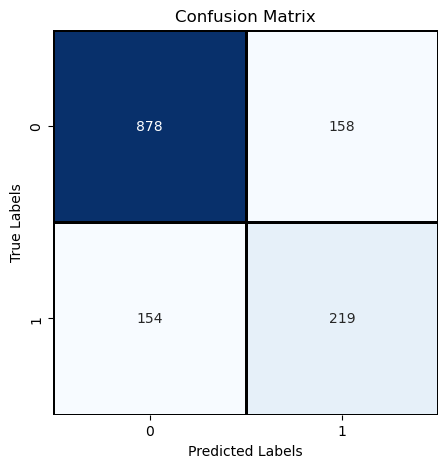

In [579]:
# Evaluate on test data
Y_test_pred = rfc.predict(X_test)

# Accuracy and report
print("Accuracy Score:\n", accuracy_score(Y_test, Y_test_pred))
print("Classification Report:\n", classification_report(Y_test, Y_test_pred))

# Confusion Matrix
cm = confusion_matrix(Y_test, Y_test_pred)

# Plotting Confusion Matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', linewidths=1, linecolor='black', square=True, cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()


True Negatives (TN): 878 — Predicted “No Churn” correctly

False Positives (FP): 158 — Predicted “Yes” when it was “No”

False Negatives (FN): 154 — Predicted “No” when it was “Yes”

True Positives (TP): 219 — Predicted “Yes Churn” correctly

In [583]:
xgb = XGBClassifier(random_state=42)

In [585]:
xgb.fit(X_train_smote, Y_train_smote)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

Accuracy Score:
 0.7955997161107168
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.89      0.86      1036
           1       0.64      0.53      0.58       373

    accuracy                           0.80      1409
   macro avg       0.74      0.71      0.72      1409
weighted avg       0.79      0.80      0.79      1409



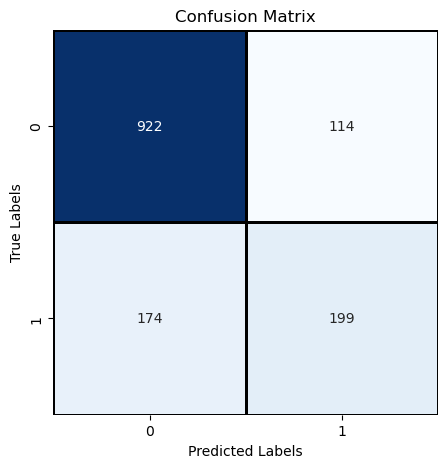

In [623]:
# Evaluate on test data
Y_test_pred = xgb.predict(X_test)

# Accuracy and report
print("Accuracy Score:\n", accuracy_score(Y_test, Y_test_pred))
print("Classification Report:\n", classification_report(Y_test, Y_test_pred))

# Confusion Matrix
cm = confusion_matrix(Y_test, Y_test_pred)

# Plotting Confusion Matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', linewidths=1, linecolor='black', square=True, cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [625]:
dtree = DecisionTreeClassifier(random_state=42)

In [627]:
dtree.fit(X_train_smote, Y_train_smote)

DecisionTreeClassifier(random_state=42)

Accuracy Score:
 0.7281760113555713
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.79      0.81      1036
           1       0.49      0.54      0.51       373

    accuracy                           0.73      1409
   macro avg       0.66      0.67      0.66      1409
weighted avg       0.74      0.73      0.73      1409



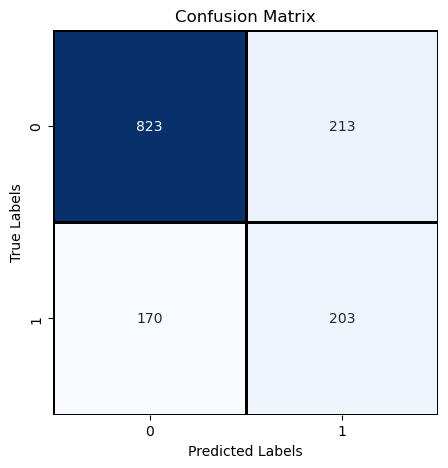

In [628]:
# Evaluate on test data
Y_test_pred = dtree.predict(X_test)

# Accuracy and report
print("Accuracy Score:\n", accuracy_score(Y_test, Y_test_pred))
print("Classification Report:\n", classification_report(Y_test, Y_test_pred))

# Confusion Matrix
cm = confusion_matrix(Y_test, Y_test_pred)

# Plotting Confusion Matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', linewidths=1, linecolor='black', square=True, cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [630]:
# Random Forest (trained on original data)
rfc = RandomForestClassifier(random_state=42)
rfc.fit(X_train, Y_train)

# XGBoost (trained on original data)
from xgboost import XGBClassifier
xgb = XGBClassifier(random_state=42)
xgb.fit(X_train, Y_train)

# Decision Tree (trained on SMOTE-balanced data)
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(random_state=42)
dtree.fit(X_train_smote, Y_train_smote)


DecisionTreeClassifier(random_state=42)

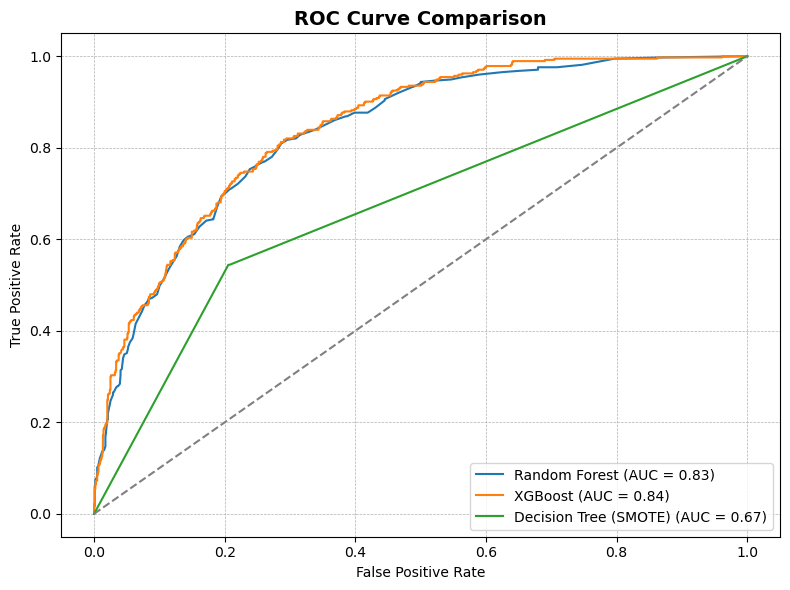

In [633]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Predict probabilities on the original test set
rfc_probs = rfc.predict_proba(X_test)[:, 1]
xgb_probs = xgb.predict_proba(X_test)[:, 1]
dtree_probs = dtree.predict_proba(X_test)[:, 1]

# Compute ROC curves and AUC
rfc_fpr, rfc_tpr, _ = roc_curve(Y_test, rfc_probs)
xgb_fpr, xgb_tpr, _ = roc_curve(Y_test, xgb_probs)
dtree_fpr, dtree_tpr, _ = roc_curve(Y_test, dtree_probs)

rfc_auc = roc_auc_score(Y_test, rfc_probs)
xgb_auc = roc_auc_score(Y_test, xgb_probs)
dtree_auc = roc_auc_score(Y_test, dtree_probs)

# Plot all ROC curves
plt.figure(figsize=(8, 6))
plt.plot(rfc_fpr, rfc_tpr, label=f'Random Forest (AUC = {rfc_auc:.2f})')
plt.plot(xgb_fpr, xgb_tpr, label=f'XGBoost (AUC = {xgb_auc:.2f})')
plt.plot(dtree_fpr, dtree_tpr, label=f'Decision Tree (SMOTE) (AUC = {dtree_auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')

# Final formatting
plt.title('ROC Curve Comparison', fontsize=14, fontweight='bold')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.grid(True, linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()


The ROC curve from the XGBoost Model for our work shows a strong performance, with the curve rising well above the diagonal line, indicating that the model can effectively distinguish between churners and non-churners. The AUC score is 0.84, which confirms that the model performs very well and is capable of correctly classifying customers about 82% of the time. This shows that my model is reliable and working as expected.

In [675]:
# save the trained model as a pickle file
model_data = {"model": xgb, "features_names": X.columns.tolist()}


with open("customer_churn_model.pkl", "wb") as f:
  pickle.dump(model_data, f)

In [677]:
# load the saved model and the feature names

with open("customer_churn_model.pkl", "rb") as f:
  model_data = pickle.load(f)

loaded_model = model_data["model"]
feature_names = model_data["features_names"]

PREDICTION

In [680]:
input_data = {
    'gender': 'Female',
    'SeniorCitizen': 0,
    'Partner': 'Yes',
    'Dependents': 'No',
    'tenure': 1,
    'PhoneService': 'No',
    'MultipleLines': 'No phone service',
    'InternetService': 'DSL',
    'OnlineSecurity': 'No',
    'OnlineBackup': 'Yes',
    'DeviceProtection': 'No',
    'TechSupport': 'No',
    'StreamingTV': 'No',
    'StreamingMovies': 'No',
    'Contract': 'Month-to-month',
    'PaperlessBilling': 'Yes',
    'PaymentMethod': 'Electronic check',
    'MonthlyCharges': 29.85,
    'TotalCharges': 29.85
}


input_data_df = pd.DataFrame([input_data])

with open("encoders.pkl", "rb") as f:
  encoders = pickle.load(f)


for column, encoder in encoders.items():
    if column in input_data_df.columns:  # Only encode if the column exists
        input_data_df[column] = encoder.transform(input_data_df[column])

# make a prediction
prediction = loaded_model.predict(input_data_df)
pred_prob = loaded_model.predict_proba(input_data_df)

print(prediction)

# results
print(f"Prediction: {'Churn' if prediction[0] == 1 else 'No Churn'}")
print(f"Prediciton Probability: {pred_prob}")

[1]
Prediction: Churn
Prediciton Probability: [[0.45488727 0.5451127 ]]


# Let try it on one hot encode with DecisionTreeClassifier, RandomForestClassifier, XGBClassifier

In [652]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
import pickle

# Define the categorical columns you want to one-hot encode
categorical_columns = Categorical_data_2  # e.g., ["Contract", "InternetService", ...]

# Create the OneHotEncoder
onehot_encoder = OneHotEncoder(drop='first', sparse_output=False, handle_unknown='ignore')

# Use ColumnTransformer to apply the encoder to the correct columns
column_transformer = ColumnTransformer(
    transformers=[
        ("onehot", onehot_encoder, categorical_columns)
    ],
    remainder='passthrough'  # Keeps the rest of the columns as they are
)

print("🔄 Applying One-Hot Encoding...\n")

# Fit and transform the dataset
Telecom_transformed = column_transformer.fit_transform(Telecom_churn_2)

# Get new column names
encoded_feature_names = column_transformer.named_transformers_['onehot'].get_feature_names_out(categorical_columns)
all_columns = list(encoded_feature_names) + [col for col in Telecom_churn.columns if col not in categorical_columns]

# Convert to DataFrame
Telecom_transformed_df = pd.DataFrame(Telecom_transformed, columns=all_columns)

print("✅ One-Hot Encoding complete.")
print(f"📊 New shape of the dataset: {Telecom_transformed_df.shape}")

# Save the transformer for future use (e.g., on test or production data)
with open("onehot_encoder.pkl", "wb") as f:
    pickle.dump(column_transformer, f)

print("💾 One-hot encoder saved to 'onehot_encoder.pkl'")

🔄 Applying One-Hot Encoding...

✅ One-Hot Encoding complete.
📊 New shape of the dataset: (7043, 31)
💾 One-hot encoder saved to 'onehot_encoder.pkl'


In [654]:
Telecom_transformed_df.head(2)

,SeniorCitizen_1,gender_1,Partner_1,Dependents_1,PhoneService_1,MultipleLines_1,MultipleLines_2,InternetService_1,InternetService_2,OnlineSecurity_1,OnlineSecurity_2,OnlineBackup_1,OnlineBackup_2,DeviceProtection_1,DeviceProtection_2,TechSupport_1,TechSupport_2,StreamingTV_1,StreamingTV_2,StreamingMovies_1,StreamingMovies_2,Contract_1,Contract_2,PaperlessBilling_1,PaymentMethod_1,PaymentMethod_2,PaymentMethod_3,Churn_1,tenure,MonthlyCharges,TotalCharges
0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,29.85,29.85
1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,34.0,56.95,1889.50


In [656]:
# splitting the features and target
X_hot = Telecom_transformed_df.drop(columns=["Churn_1"])
y_hot = Telecom_transformed_df["Churn_1"]

In [658]:
# split training and test data
Xhot_train, Xhot_test, yhot_train, yhot_test = train_test_split(X_hot, y_hot, test_size=0.2, random_state=42)

In [659]:
print(yhot_train.value_counts())

Churn_1
0.0    4138
1.0    1496
Name: count, dtype: int64


In [662]:
smote = SMOTE(random_state=42)
Xhot_train_smote, yhot_train_smote = smote.fit_resample(Xhot_train, yhot_train)

Due to the imbalance in the target variable (Churn: 4138 No, 1496 Yes), I applied SMOTE to oversample the minority class and balance the dataset. This helps the model learn from both classes more effectively, reducing bias toward the majority class and improving predictive performance, especially in identifying churned customers.

In [665]:
print(yhot_train_smote.value_counts())

Churn_1
0.0    4138
1.0    4138
Name: count, dtype: int64


In [667]:
# dictionary of models
models_hot = {
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "XGBoost": XGBClassifier(random_state=42)
}

In [668]:
# dictionary to store the cross validation results
cv_scores = {}

# perform 5-fold cross validation for each model
for model_name, model in models_hot.items():
  print(f"Training {model_name} with default parameters")
  scores = cross_val_score(model, Xhot_train_smote, yhot_train_smote, cv=5, scoring="accuracy")
  cv_scores[model_name] = scores
  print(f"{model_name} cross-validation accuracy: {np.mean(scores):.2f}")
  print("-"*70)

Training Decision Tree with default parameters
Decision Tree cross-validation accuracy: 0.80
----------------------------------------------------------------------
Training Random Forest with default parameters
Random Forest cross-validation accuracy: 0.84
----------------------------------------------------------------------
Training XGBoost with default parameters
XGBoost cross-validation accuracy: 0.83
----------------------------------------------------------------------


# Note 

Even when we hot encode instead of label encoder, random forest still has higher accuracy than the other three model 

# Let try Downsampling on label encoder data

In [346]:
from imblearn.under_sampling import RandomUnderSampler

# Create the under-sampler
undersample = RandomUnderSampler(random_state=42)

# Apply downsampling
X_train_down, Y_train_down = undersample.fit_resample(X_train, Y_train)

In [347]:
# dictionary of models
models = {
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "XGBoost": XGBClassifier(random_state=42)}

In [348]:
# dictionary to store the cross validation results
cv_scores = {}

# perform 5-fold cross validation for each model
for model_name, model in models.items():
  print(f"Training {model_name} with default parameters")
  scores = cross_val_score(model, X_train_down, Y_train_down, cv=5, scoring="accuracy")
  cv_scores[model_name] = scores
  print(f"{model_name} cross-validation accuracy: {np.mean(scores):.2f}")
  print("-"*70)

Training Decision Tree with default parameters
Decision Tree cross-validation accuracy: 0.68
----------------------------------------------------------------------
Training Random Forest with default parameters
Random Forest cross-validation accuracy: 0.75
----------------------------------------------------------------------
Training XGBoost with default parameters
XGBoost cross-validation accuracy: 0.73
----------------------------------------------------------------------


# CONCLUSION 